### Image Resize: file version

In [1]:
from PIL import Image

def resize_image(input_path, output_path, new_width):
    try:
        image = Image.open(input_path)
        width_percent = (new_width / float(image.size[0]))
        new_height = int((float(image.size[1]) * float(width_percent)))
        resized_image = image.resize((new_width, new_height))
        resized_image.save(output_path)
        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Replace 'input_image.jpg' and 'resized_output_image.jpg' with your file paths
input_image_path = 'testimage.jpg'
output_image_path = 'resized_output_image.jpg'

# default size is 256 by 256 pixels, resized to 100 x 100 px
resize_image(input_image_path, output_image_path, new_width=100)  # Adjust the new width as needed


Image resized and saved to resized_output_image.jpg


### Converting to Numpy and Displaying: file version

(100, 100, 3)


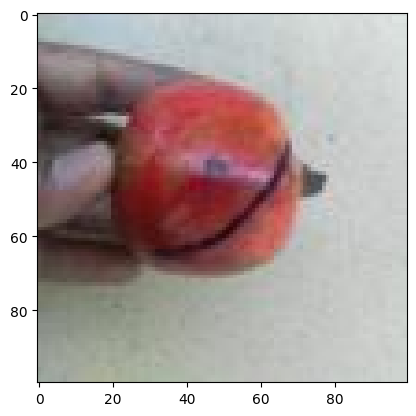

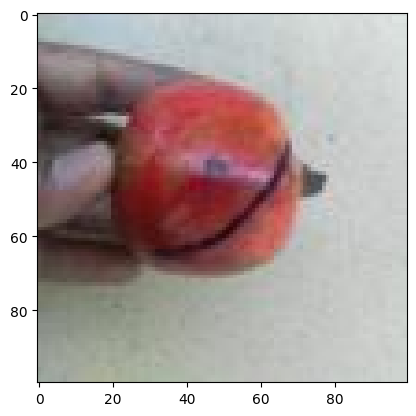

(100, 100, 3)


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open('resized_output_image.jpg')

# Convert the image to a numpy array
pixels = np.array(image)
print(pixels.shape)

# Save the numpy array as a .npy file
np.save('output.npy', pixels)

# Display the image
plt.imshow(pixels)
plt.show()

data = np.load("output.npy")
plt.imshow(data)
plt.show()

print(data.shape)


### Image Resize: folder version

In [3]:
import os
from PIL import Image

def resize_image(input_path, output_path, new_width):
    try:
        image = Image.open(input_path)
        width_percent = (new_width / float(image.size[0]))
        new_height = int((float(image.size[1]) * float(width_percent)))
        resized_image = image.resize((new_width, new_height))
        resized_image.save(output_path)
        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Define the input directory and output directory
input_dir = 'pomegranate_bad_subset'
output_dir = 'pbs_resize'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get all files in the directory
files = os.listdir(input_dir)

# Process each file
for filename in files:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Define the input path and output path
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Resize the image
        resize_image(input_path, output_path, new_width=100)  # Adjust the new width as needed

Image resized and saved to pbs_resize\IMG_20190822_083956.jpg
Image resized and saved to pbs_resize\IMG_20190822_083957.jpg
Image resized and saved to pbs_resize\IMG_20190822_083958.jpg
Image resized and saved to pbs_resize\IMG_20190822_083958_1.jpg
Image resized and saved to pbs_resize\IMG_20190822_083959.jpg
Image resized and saved to pbs_resize\IMG_20190822_084000.jpg
Image resized and saved to pbs_resize\IMG_20190822_084001.jpg
Image resized and saved to pbs_resize\IMG_20190822_084002.jpg


### Converting to Numpy and Visualizing: folder version

(8, 100, 100, 3)
[[[176 182 182]
  [177 183 183]
  [179 184 187]
  ...
  [217 223 221]
  [216 222 220]
  [215 221 219]]

 [[176 185 184]
  [176 185 184]
  [176 184 186]
  ...
  [223 229 227]
  [223 229 227]
  [222 228 226]]

 [[177 189 187]
  [176 188 186]
  [173 187 187]
  ...
  [222 228 226]
  [221 227 225]
  [220 226 224]]

 ...

 [[148 158 149]
  [153 163 154]
  [157 167 158]
  ...
  [206 211 207]
  [206 211 207]
  [206 211 207]]

 [[152 162 153]
  [157 167 158]
  [158 168 159]
  ...
  [206 211 207]
  [206 211 207]
  [206 211 207]]

 [[155 165 156]
  [158 168 159]
  [158 168 159]
  ...
  [206 211 207]
  [206 211 207]
  [207 212 208]]]


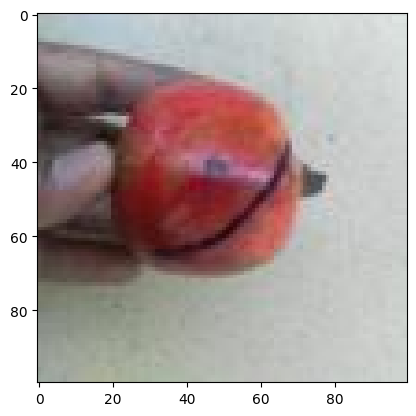

In [4]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the input directory
input_dir = 'pbs_resize'

# Get all files in the directory
files = os.listdir(input_dir)

# Initialize an empty list to store all image data
all_images = []

# Process each file
for filename in files:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Define the input path
        input_path = os.path.join(input_dir, filename)

        # Load the image
        image = Image.open(input_path)

        # Convert the image to a numpy array
        pixels = np.array(image)

        # Add the image data to the list
        all_images.append(pixels)

# Convert the list of all image data to a numpy array
all_images_array = np.array(all_images)

# Save the numpy array as a .npy file
np.save('all_images.npy', all_images_array)

# Print the shape of the numpy array
print(all_images_array.shape)
print(all_images_array[0])
plt.imshow(all_images_array[0])

### Add labels to images: folder version

In [5]:
import pandas as pd
import numpy as np

# Example array of images (replace this with your array of images)
image1 = np.random.rand(32, 32, 3)  # Example image shape: 32x32x3 (height x width x channels)
image2 = np.random.rand(32, 32, 3)
image3 = np.random.rand(32, 32, 3)
images_array = np.array([image1, image2, image3])  # Array of images

# Example labels corresponding to the images
labels = np.array([0, 1, 0])  # Example labels (replace with your own labels)

# Combining images and labels
labeled_data = list(zip(images_array, labels))  # Combining images and labels using zip
# Accessing the labeled data
for image, label in labeled_data:
    # Here, 'image' is the image array and 'label' is its associated label
    print(f"Image Shape: {image.shape}, Label: {label}")

# Assuming images_array is your 4D numpy array of images and labels is your 1D numpy array of labels
df = pd.DataFrame({'Image': list(images_array), 'Label': labels})

# Now, each row in the DataFrame corresponds to an image and its label
print(df)


Image Shape: (32, 32, 3), Label: 0
Image Shape: (32, 32, 3), Label: 1
Image Shape: (32, 32, 3), Label: 0
                                               Image  Label
0  [[[0.4426715488835067, 0.3520940129341428, 0.3...      0
1  [[[0.5392753363988061, 0.7260528240374692, 0.5...      1
2  [[[0.4588460745785009, 0.30308251365641414, 0....      0


In [7]:
#1d for fruit categories

## Pre-Alpha Testing

### Pre-Alpha Testing: Resizing the Images

In [6]:
import os
from PIL import Image

def resize_image(input_path, output_path, new_width):
    try:
        image = Image.open(input_path)
        width_percent = (new_width / float(image.size[0]))
        new_height = int((float(image.size[1]) * float(width_percent)))
        resized_image = image.resize((new_width, new_height))
        resized_image.save(output_path)
        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Define the input directory and output directory
input_dir = 'FruitDataSet'
output_dir = 'FruitDataset_resize'

# Process each file
for dirpath, dirnames, filenames in os.walk(input_dir):
    for filename in filenames:
        # Check if the file is an image
        if filename.endswith('.jpg'):
            # Define the input path and output path
            input_path = os.path.join(dirpath, filename)
            relative_path = os.path.relpath(dirpath, input_dir)
            output_path_dir = os.path.join(output_dir, relative_path)

            # Create output directory if it doesn't exist
            os.makedirs(output_path_dir, exist_ok=True)

            output_path = os.path.join(output_path_dir, filename)

            # Resize the image
            resize_image(input_path, output_path, new_width=100)  # Adjust the new width as needed

Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115439.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115448.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115451.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115459.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115505.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115513.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115521.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115527.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115534.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115547.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115602.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115606.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\201908

### Convert Images to Numpy Arrays and Visualize

(6000, 100, 100, 3)
[[[0.86666667 0.90980392 0.98039216]
  [0.86666667 0.90980392 0.98039216]
  [0.86666667 0.91764706 0.99215686]
  ...
  [0.69411765 0.61568627 0.52156863]
  [0.72156863 0.64313725 0.54901961]
  [0.69019608 0.61176471 0.51764706]]

 [[0.86666667 0.90980392 0.98039216]
  [0.8627451  0.91372549 0.98039216]
  [0.86666667 0.91764706 0.99215686]
  ...
  [0.68627451 0.60784314 0.51372549]
  [0.7254902  0.64705882 0.55294118]
  [0.69019608 0.61176471 0.51764706]]

 [[0.86666667 0.91764706 0.98431373]
  [0.85882353 0.92156863 0.98431373]
  [0.85882353 0.91764706 0.99215686]
  ...
  [0.67843137 0.59215686 0.50196078]
  [0.73333333 0.65490196 0.56078431]
  [0.69019608 0.61176471 0.51764706]]

 ...

 [[0.12156863 0.14117647 0.15686275]
  [0.13333333 0.16470588 0.17647059]
  [0.20392157 0.23137255 0.2627451 ]
  ...
  [0.48235294 0.38039216 0.32156863]
  [0.4745098  0.37254902 0.31372549]
  [0.46666667 0.36470588 0.30588235]]

 [[0.14117647 0.16078431 0.17647059]
  [0.17647059 0.2

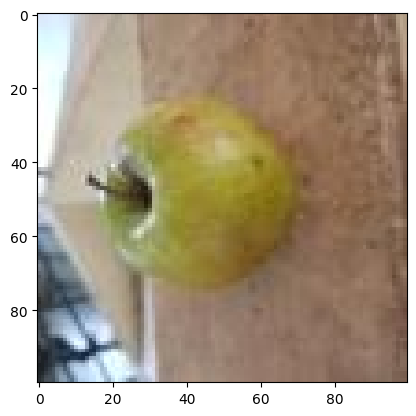

In [22]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the input directory
input_dir = 'FruitDataset_resize'

# Initialize an empty list to store all image data
all_images = []

# Process each file
for dirpath, dirnames, filenames in os.walk(input_dir):
    for filename in filenames:
        # Check if the file is an image
        if filename.endswith('.jpg'):
            # Define the input path
            input_path = os.path.join(dirpath, filename)

            # Load the image
            image = Image.open(input_path)

            # Convert the image to a numpy array
            pixels = np.array(image) / 255.0

            # Add the image data to the list
            all_images.append(pixels)

# Convert the list of all image data to a numpy array
all_images_array = np.array(all_images)

# Save the numpy array as a .npy file
np.save('dataset.npy', all_images_array)

# Print the shape of the numpy array
print(all_images_array.shape)
print(all_images_array[0])
plt.imshow(all_images_array[0])

### Convert to Pandas and Label It

In [23]:
import numpy as np
import pandas as pd

# Load the numpy array from the .npy file
data = np.load('dataset.npy', allow_pickle=True)

# Label each image
labels = np.arange(data.shape[0]) // 1000

# Create a DataFrame with the images and labels
df = pd.DataFrame({'Image': list(data), 'Label': labels})
first_image = df.iloc[0]['Image']

# print(df)
# Display the DataFrame
# print(df)
# Convert the DataFrame to a numpy array
data_labelled = df.to_numpy()

# Print the shape of the labelled data array
print(data_labelled.shape)

# Print the shape of the first image in the labelled data array
print(data_labelled[1][0].shape)

# Print the value of the first pixel of the first image in the labelled data array
print(data_labelled[1][0][0][0][0])

# Print the labels from the data_labelled array
print(data_labelled[:, 1])


# Save the numpy array to a .npy file
np.save('dataset_labelled.npy', data_labelled)

(6000, 2)
(100, 100, 3)
0.8941176470588236
[0 0 0 ... 5 5 5]


### Shuffling The Data and Splitting into Training and Testing

In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Shuffle the data
df = shuffle(df, random_state=42)
df = shuffle(df, random_state=31)
print(df.head())
print(df.tail())

# Split the data into images and labels
X = np.stack(df['Image'].values)
y = df['Label'].values

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the training and testing sets
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

                                                  Image  Label
4381  [[[0.6705882352941176, 0.6862745098039216, 0.6...      4
2050  [[[0.40784313725490196, 0.5686274509803921, 0....      2
4464  [[[0.8196078431372549, 0.8627450980392157, 0.8...      4
3634  [[[0.3843137254901961, 0.3137254901960784, 0.3...      3
4725  [[[0.7568627450980392, 0.796078431372549, 0.79...      4
                                                  Image  Label
2138  [[[0.6196078431372549, 0.6039215686274509, 0.5...      2
5455  [[[0.3568627450980392, 0.4666666666666667, 0.2...      5
1530  [[[0.8588235294117647, 0.8313725490196079, 0.7...      1
2412  [[[0.8627450980392157, 0.8901960784313725, 0.9...      2
943   [[[0.6784313725490196, 0.6549019607843137, 0.5...      0
(5400, 100, 100, 3)
(600, 100, 100, 3)
(5400,)
(600,)


### Model Design

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28224)          

### Model Training

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


169/169 [==============================] - 17s 97ms/step - loss: 0.5848 - accuracy: 0.7946 - val_loss: 0.1964 - val_accuracy: 0.9517
Epoch 2/5
169/169 [==============================] - 16s 94ms/step - loss: 0.1858 - accuracy: 0.9402 - val_loss: 0.1512 - val_accuracy: 0.9567
Epoch 3/5
169/169 [==============================] - 18s 106ms/step - loss: 0.1044 - accuracy: 0.9670 - val_loss: 0.1377 - val_accuracy: 0.9583
Epoch 4/5
169/169 [==============================] - 18s 106ms/step - loss: 0.1303 - accuracy: 0.9569 - val_loss: 0.1223 - val_accuracy: 0.9583
Epoch 5/5
169/169 [==============================] - 16s 97ms/step - loss: 0.0817 - accuracy: 0.9726 - val_loss: 0.1823 - val_accuracy: 0.9450


### Model Evaluation

Text(0.5, 1.0, 'Train - Accuracy')

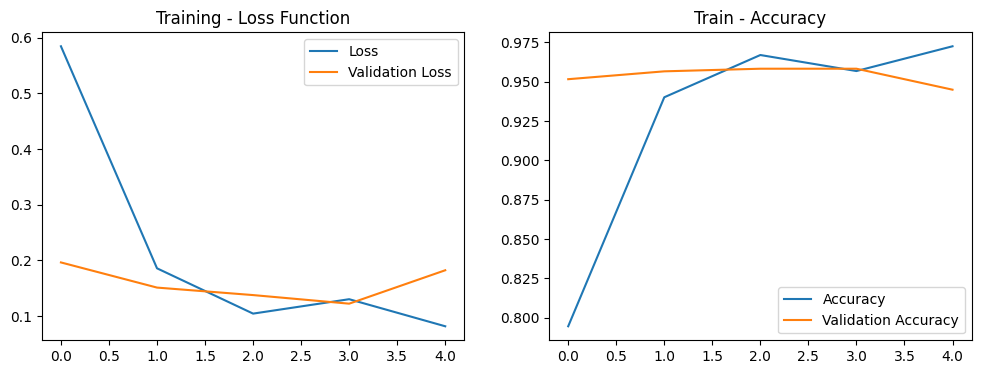

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [41]:
from keras.preprocessing import image
import numpy as np

# Load the image
img = image.load_img('banana.jpg', target_size=(100, 100))

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = img_array / 255
print(img_array.shape)

# # Expand the dimensions of the image
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)

class_labels = ['Apple', 'Banana', 'Guava', 'Lime', 'Orange', 'Pomegranate']
# Use the model to make a prediction
predictions = model.predict(img_array)
class_label = class_labels[np.argmax(predictions)]
print(class_label)

(100, 100, 3)
(1, 100, 100, 3)
1/1 [==============================] - 0s 43ms/step
Banana


In [42]:
import os
from keras.preprocessing import image
import numpy as np

# Directory containing images
directory = 'FruitDataSet\Apple_Good'
# Counters for correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0
class_labels = ['Apple', 'Banana', 'Guava', 'Lime', 'Orange', 'Pomegranate']

# Iterate over every file in the directory
for filename in os.listdir(directory):
    # Load the image
    img = image.load_img(os.path.join(directory, filename), target_size=(100, 100))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Normalize the pixel values
    img_array = img_array / 255.0

    # Expand the dimensions of the image
    img_array = np.expand_dims(img_array, axis=0)

    # Use the model to make a prediction
    predictions = model.predict(img_array)
    class_label = class_labels[np.argmax(predictions)]
    if class_label == 'Apple':
        correct_predictions += 1
    else: incorrect_predictions += 1
    print(class_label)
print("Correct predictions", correct_predictions)
print("incorrect_predictions", incorrect_predictions)

1/1 [==============================] - 0s 44ms/step
Apple
1/1 [==============================] - 0s 38ms/step
Apple
1/1 [==============================] - 0s 41ms/step
Apple
1/1 [==============================] - 0s 32ms/step
Apple
1/1 [==============================] - 0s 41ms/step
Apple
1/1 [==============================] - 0s 41ms/step
Apple
1/1 [==============================] - 0s 39ms/step
Apple
1/1 [==============================] - 0s 46ms/step
Guava
1/1 [==============================] - 0s 39ms/step
Apple
1/1 [==============================] - 0s 36ms/step
Apple
1/1 [==============================] - 0s 37ms/step
Apple
1/1 [==============================] - 0s 43ms/step
Apple
1/1 [==============================] - 0s 45ms/step
Banana
1/1 [==============================] - 0s 36ms/step
Apple
1/1 [==============================] - 0s 39ms/step
Banana
1/1 [==============================] - 0s 38ms/step
Banana
1/1 [==============================] - 0s 42ms/step
Apple
1/1 [======